* Probability is the mathematical field concerned with readoning under uncertainity.
* Given a probabilistic model of some process, we can reason about the likelihood of various events happening.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

## 1.1 Simple example: Tossing Coins

* Imagine we are tossing a coin and we want to quantity how likely we are to see heads or tails.
* If the coin is `fair`, then both outcomes heads or tails are equally likely.
* Since there are two possible outcomes, the probability or getting either one of them is `0.5`.
* Suppose we want to see the number of heads and tails in some amount of tosses say 100 tosses. A few questions arise from here what is the probability of getting heads or tails.
* Note the probability of random events always add up to one.

In [5]:
import numpy as np
num_tosses = 100
heads = sum([np.random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print(f"Heads: {heads}, Tails:{tails}")

Heads: 53, Tails:47


* We can simulate multiple draws from any variable with a finite number of possible outcomes by calling the multinomial function, setting the first argument to the number of draws and the second as the list of probabilities of our associated random events.
* To simulate 100 tosses of a fair coin, we assign the probability vector `[0.5,0.5]`,interpreting index 0 as heads and index 1 as tails.

In [6]:
import torch
fair_probs = torch.tensor([0.5,0.5])
Multinomial(100,fair_probs).sample()

tensor([55., 45.])

* Dividing by the number of tosses gives us the `frequency` of each outcome in our data.

In [7]:
Multinomial(100,fair_probs).sample() / 100

tensor([0.4300, 0.5700])

* Note that each time you run the sampling process, you will recevice a new random value that may differ from the previous outcome.

In [9]:
## simulating 10,000 tosses
counts = Multinomial(10000,fair_probs).sample()
counts / 10000

tensor([0.4946, 0.5054])

* For averages of repeated events, as the number of repitions grows, our estimates are guaranteed to converge to the true underlying probabilities.
* The mathematical formulation of this phenomenon is called the `law of large numbers`and the `central limit theorem` tells us that in many situations, as the sample size grows by `n` grows, these erros go down at the rate of $\frac{1}{\sqrt{n}}$.
Let's see how our estimate evolves as we grow the number of tosses from 1 to 10,000.

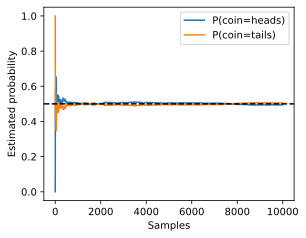

In [10]:
counts = Multinomial(1,fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1,keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5,3.5))
d2l.plt.plot(estimates[:,0],label=("P(coin=heads)"))
d2l.plt.plot(estimates[:,1],label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5,color='black',linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

* From the plot above the dashed line represents the true underlying probability.
* As we get more data by conducting more experiments, the curves converge towards the true probability.

## 1.2 Key Concepts in Probability

### Random Variable
A **random variable** is a variable whose possible values are numerical outcomes of a random phenomenon. Random variables are typically denoted by capital letters, such as $X$ or $Y$. In our coin toss example, we could define a random variable $X$ that takes the value 1 if the coin lands on heads and 0 if it lands on tails.

### Expected Value (Mean)
The **expected value** (or mean) of a random variable is the sum of the product of each possible outcome and its probability. It represents the average outcome we would expect if we repeated the experiment many times.

For a discrete random variable $X$ with possible values $x_1, x_2, \dots, x_n$ and corresponding probabilities $P(X=x_1), P(X=x_2), \dots, P(X=x_n)$, the expected value is:

$E[X] = \sum_{i=1}^{n} x_i P(X=x_i)$

For a fair coin ($P(Heads)=0.5, P(Tails)=0.5$), if we let $X=1$ for heads and $X=0$ for tails, then $E[X] = (1 \times 0.5) + (0 \times 0.5) = 0.5$.

### Variance
**Variance** measures how far a set of numbers is spread out from their average value. A high variance indicates that the data points are very spread out from the mean, while a low variance indicates that the data points are clustered closely around the mean.

For a discrete random variable $X$, the variance is defined as:

$Var[X] = E[(X - E[X])^2] = \sum_{i=1}^{n} (x_i - E[X])^2 P(X=x_i)$

For our fair coin example, with $E[X] = 0.5$:

$Var[X] = (1 - 0.5)^2 \times 0.5 + (0 - 0.5)^2 \times 0.5 = (0.5)^2 \times 0.5 + (-0.5)^2 \times 0.5 = 0.25 \times 0.5 + 0.25 \times 0.5 = 0.125 + 0.125 = 0.25$

The **standard deviation** is the square root of the variance, providing a measure of spread in the original units.

In [14]:
import numpy as np

# Define the random variable for a fair coin toss
# X = 1 for Heads, X = 0 for Tails
outcomes = [1, 0] # Heads, Tails
probabilities = [0.5, 0.5]

# Simulate a single coin toss (Random Variable in action)
coin_toss = np.random.choice(outcomes, p=probabilities)
print(f"Result of a single coin toss (random variable X): {coin_toss}")

# Calculate Expected Value E[X]
expected_value = sum(x * p for x, p in zip(outcomes, probabilities))
print(f"Expected Value E[X]: {expected_value}")

# Calculate Variance Var[X]
variance = sum(((x - expected_value)**2) * p for x, p in zip(outcomes, probabilities))
print(f"Variance Var[X]: {variance}")
print(f"Standard Deviation: {np.sqrt(variance)}")

Result of a single coin toss (random variable X): 0
Expected Value E[X]: 0.5
Variance Var[X]: 0.25
Standard Deviation: 0.5


### Bernoulli Distribution
The **Bernoulli distribution** is the probability distribution of a random variable that takes value 1 with probability $p$ and value 0 with probability $1-p$. It is a special case of the binomial distribution where a single trial is conducted.

Our coin toss is an example of a Bernoulli trial. If 'Heads' is considered a 'success' (value 1) and 'Tails' a 'failure' (value 0), and the probability of 'Heads' is $p=0.5$, then the outcome of a single toss follows a Bernoulli distribution.

In [15]:
from torch.distributions import Bernoulli
import torch

# Probability of success (Heads) for a Bernoulli trial
p = 0.5
bernoulli_dist = Bernoulli(p)

# Sample from a Bernoulli distribution (single trial)
single_bernoulli_sample = bernoulli_dist.sample()
print(f"Single sample from Bernoulli(p={p}): {single_bernoulli_sample}")

# Sample multiple times to see the distribution
num_samples = 10
multiple_bernoulli_samples = bernoulli_dist.sample((num_samples,))
print(f"\n{num_samples} samples from Bernoulli(p={p}): {multiple_bernoulli_samples}")
print(f"Number of 1s (Heads): {multiple_bernoulli_samples.sum()}")

Single sample from Bernoulli(p=0.5): 0.0

10 samples from Bernoulli(p=0.5): tensor([1., 1., 1., 0., 1., 0., 0., 1., 1., 1.])
Number of 1s (Heads): 7.0


### Binomial Distribution
The **Binomial distribution** describes the number of successes in a fixed number of independent Bernoulli trials. For example, if we toss a coin 100 times, the number of heads we observe follows a binomial distribution.

If $n$ is the number of trials and $p$ is the probability of success on each trial, the probability of getting exactly $k$ successes is given by the probability mass function:

$P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}$

where $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the binomial coefficient, representing the number of ways to choose $k$ successes from $n$ trials. In our example `Multinomial(100, fair_probs).sample()`, the first element of the tensor (number of heads) effectively follows a Binomial distribution $B(100, 0.5)$.

In [16]:
from torch.distributions import Binomial

# Number of trials (n) and probability of success (p)
n = 100
p = 0.5
binomial_dist = Binomial(total_count=n, probs=p)

# Sample from a Binomial distribution
# This gives the number of successes (e.g., heads) in 'n' trials
num_heads_in_100_tosses = binomial_dist.sample()
print(f"Number of heads in {n} tosses (Binomial(n={n}, p={p})): {num_heads_in_100_tosses}")

# Compare with our previous Multinomial example (first element corresponds to Binomial)
# multinomial_sample = Multinomial(n, fair_probs).sample()
# print(f"Multinomial sample for {n} tosses: {multinomial_sample}")
# print(f"First element of Multinomial sample (Heads): {multinomial_sample[0]}")

Number of heads in 100 tosses (Binomial(n=100, p=0.5)): 44.0
